Backtesting and Report for Moving Average Crossover

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


=== Moving Average Crossover Strategy ===
Total Return: 43.42%
Number of Trades: 9


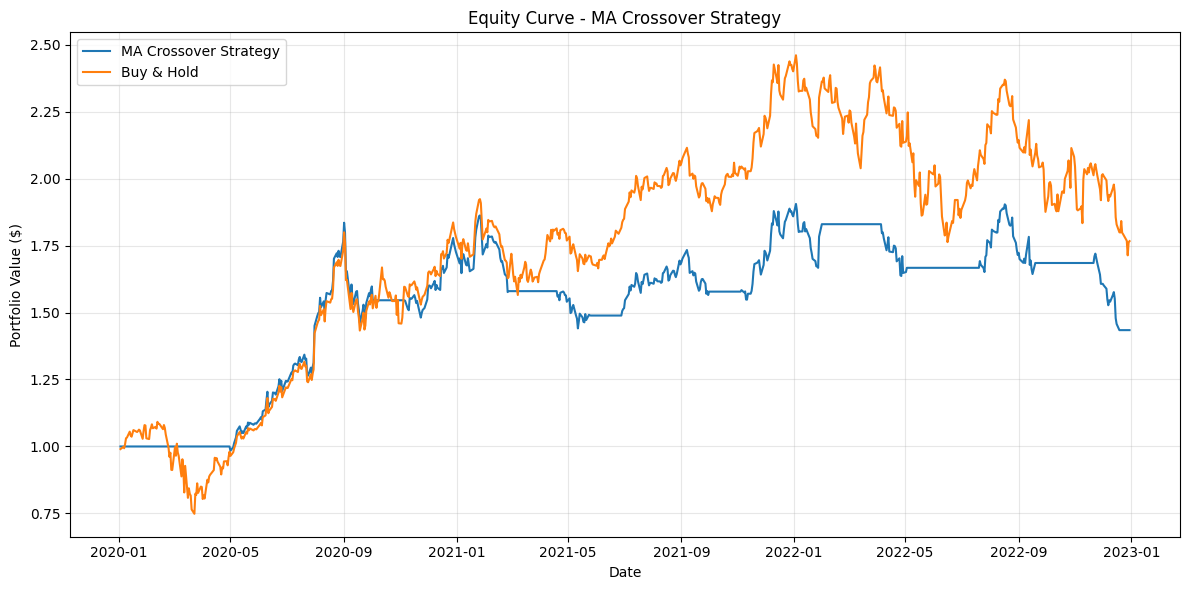

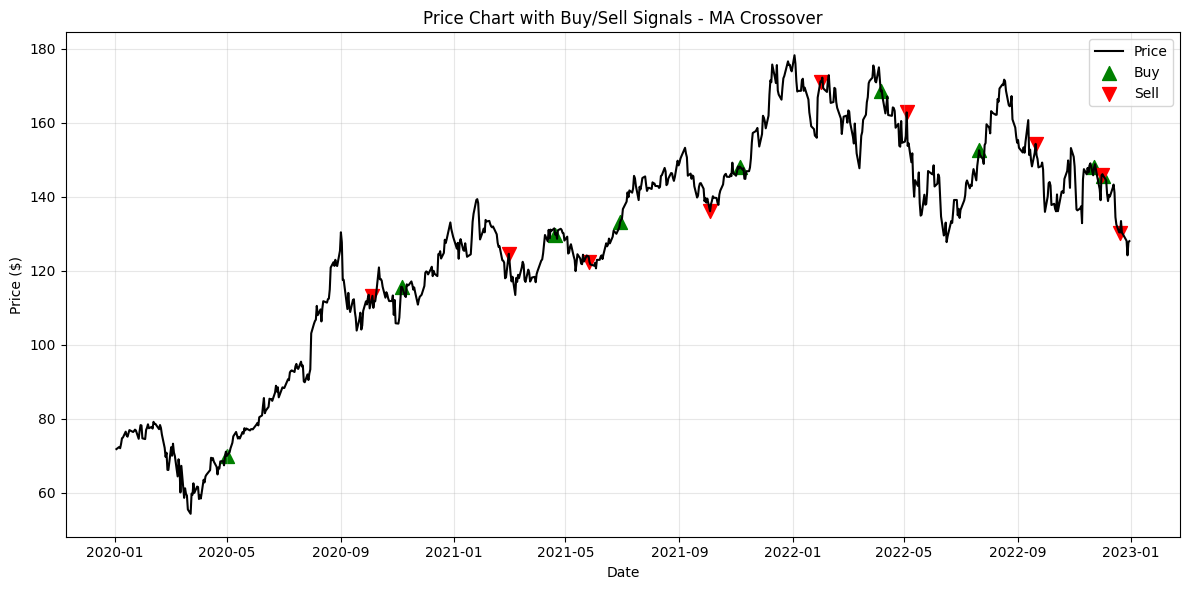

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Run the backtest and report the results
QUIET = True
%run loading-price-data.ipynb
%run backtesting-framework.ipynb
%run moving-average-crossover.ipynb

# Load MA Crossover strategy
signal_ma = ma_crossover_momentum_strategy(data, fast_n=20, slow_n=50)
results_ma = backtest_framework(data, signal_ma)

# Adding all reporting/metrics calculations

# Calculate Cumulative Returns
results_ma['Strategy_Cumulative'] = (1 + results_ma['Strategy_Returns']).cumprod()
results_ma['BuyHold_Cumulative'] = (1 + results_ma['Buy_and_Hold_Returns']).cumprod()

# Track trades
results_ma['Position_Change'] = results_ma['Position'].diff()
results_ma['Buy_Signal'] = (results_ma['Position_Change'] == 1).astype(int)
results_ma['Sell_Signal'] = (results_ma['Position_Change'] == -1).astype(int)

# Calculate metrics
strategy_total_return = (results_ma['Strategy_Cumulative'].iloc[-1] - 1) * 100
buyhold_total_return = (results_ma['BuyHold_Cumulative'].iloc[-1] - 1) * 100
num_trades = results_ma['Buy_Signal'].sum()

print(f"=== Moving Average Crossover Strategy ===")
print(f"Total Return: {strategy_total_return:.2f}%")
print(f"Number of Trades: {num_trades}")

# Equity curve
plt.figure(figsize=(12, 6))
plt.plot(results_ma.index, results_ma['Strategy_Cumulative'], label='MA Crossover Strategy')
plt.plot(results_ma.index, results_ma['BuyHold_Cumulative'], label='Buy & Hold')
plt.title('Equity Curve - MA Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Price chart with buy/sell markers
plt.figure(figsize=(12, 6))
plt.plot(results_ma.index, results_ma['Close'], label='Price', color='black')
buy_points = results_ma[results_ma['Buy_Signal'] == 1]
sell_points = results_ma[results_ma['Sell_Signal'] == 1]
plt.scatter(buy_points.index, buy_points['Close'], marker='^', color='green', s=100, label='Buy')
plt.scatter(sell_points.index, sell_points['Close'], marker='v', color='red', s=100, label='Sell')
plt.title('Price Chart with Buy/Sell Signals - MA Crossover')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

